In [12]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
num_samples = 1000
num_features = 10

# Generate random feature data
X = np.random.randn(num_samples, num_features)

# Generate a binary target variable with some random noise
# Assume that the first half of the features contribute positively to the target,
# and the second half contribute negatively
coefficients = np.array([1]*5 + [-1]*5)
linear_combination = X @ coefficients

# Apply a logistic function to get probabilities
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target variable based on probabilities
y = np.random.binomial(1, probabilities)

# Create a DataFrame with the numerical features
feature_columns = [f'feature_{i+1}' for i in range(num_features)]
df = pd.DataFrame(X, columns=feature_columns)
df['target'] = y

# Generate nominal categorical data
nominal_categories = ['apple', 'banana', 'cherry', 'date']
df['fruit'] = np.random.choice(nominal_categories, num_samples)

# Generate ordinal categorical data
ordinal_categories = ['High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = np.random.choice(ordinal_categories, num_samples)

# Display the first few rows of the DataFrame
print(df.head())

# Optionally save to CSV
df.to_csv('enhanced_binary_classification_data.csv', index=False)

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  


In [13]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.010788,0.031292,-0.022542,-0.043075,0.013622,-0.029252,-0.002689,0.005495,-0.023104,0.038105,0.504000
std,1.005433,1.016046,0.983366,0.983406,1.012645,1.037024,1.031230,1.030962,0.986846,0.945284,0.500234
min,-3.922400,-3.688365,-3.241267,-2.943142,-3.138515,-3.170426,-2.801912,-3.601085,-3.007632,-3.176704,0.000000
25%,-0.616527,-0.631506,-0.702626,-0.750008,-0.651541,-0.749592,-0.744779,-0.713176,-0.650034,-0.559290,0.000000
50%,0.014006,0.007605,-0.015036,-0.001346,-0.012020,-0.012086,-0.024976,-0.013284,-0.003221,0.019097,1.000000
75%,0.679698,0.685621,0.613766,0.638310,0.721896,0.680087,0.683319,0.696602,0.608861,0.687027,1.000000
max,3.076860,3.529055,3.152057,3.117681,2.935658,3.926238,3.243093,3.137749,3.377383,3.852731,1.000000


<Axes: >

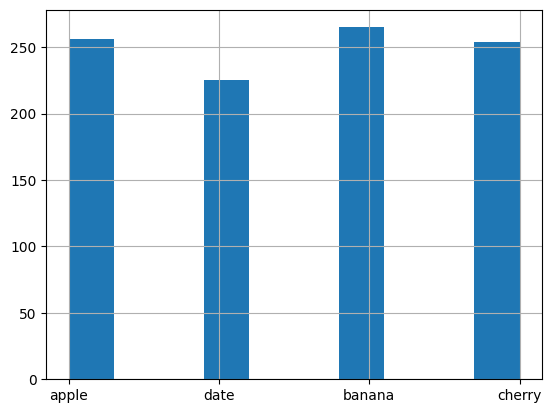

In [14]:
df['fruit'].hist()

<Axes: >

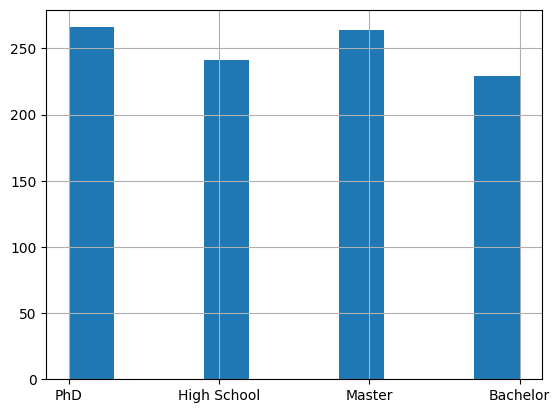

In [15]:
df['education_level'].hist()

<Axes: >

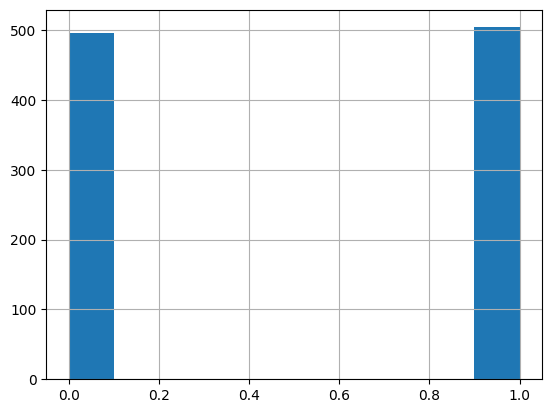

In [16]:
df['target'].hist()

In [10]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# One-hot encode the nominal categorical feature
one_hot = pd.get_dummies(df['fruit'], prefix='fruit')

# Ordinal encode the ordinal categorical feature
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
df['education_level_encoded'] = ordinal_encoder.fit_transform(df[['education_level']])

# Combine the original DataFrame with the encoded features
df = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns
df.drop(['fruit', 'education_level'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target  \
0   1.579213   0.767435  -0.469474    0.542560       1   
1  -1.012831   0.314247  -0.908024   -1.412304       0   
2  -1.150994   0.375698  -0.600639   -0.291694       1   
3   0.208864  -1.959670  -1.328186    0.196861       1   
4  -0.460639   1.057122   0.343618   -1.763040       1   

   education_level_encoded  fruit_apple  fruit_banana  fruit_cherry  \
0                      3.0         True         False         False   
1                      3.0         True         False         False   
2          

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('enhanced_binary_classification_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Define feature columns
numerical_features = [f'feature_{i+1}' for i in range(10)]
nominal_features = ['fruit']
ordinal_features = ['education_level']

# Define the target
target = 'target'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('nom', OneHotEncoder(), nominal_features),
        ('ord', OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']]), ordinal_features)
    ])

# Split the data into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = pipeline.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  
Validation Accuracy: 0.7533
              precision    recall  f1-score   support

    

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Grid Search: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# Validate the best model
best_grid_model = grid_search.best_estimator_
y_val_pred = best_grid_model.predict(X_val)
print(f'Validation Accuracy with Grid Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_grid_model.predict(X_test)
print(f'Test Accuracy with Grid Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by Grid Search: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 0.8157
Validation Accuracy with Grid Search: 0.7733
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        74
           1       0.78      0.78      0.78        76

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150

Test Accuracy with Grid Search: 0.8267
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        75
           1       0.80      0.88      0.84        75

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Search
param_dist = {
    'classifier__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'classifier__max_depth': [None] + [int(x) for x in np.linspace(10, 100, num=10)],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create a Random Search object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=3, random_state=42)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Random Search: {random_search.best_params_}')
print(f'Best cross-validation accuracy: {random_search.best_score_:.4f}')

# Validate the best model
best_random_model = random_search.best_estimator_
y_val_pred = best_random_model.predict(X_val)
print(f'Validation Accuracy with Random Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_random_model.predict(X_test)
print(f'Test Accuracy with Random Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by Random Search: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 50, 'classifier__bootstrap': True}
Best cross-validation accuracy: 0.8229
Validation Accuracy with Random Search: 0.7867
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        74
           1       0.80      0.78      0.79        76

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150

Test Accuracy with Random Search: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        75
           1       0.81      0.87      0.84        75

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weight